# **Given**

In [1]:
def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary
# Remember for each letter in your word it will add 8 more bits so choose a relatively shorter word ~12 letters or less

In [2]:
def binary_to_word(binary_str):
    # Pad with zeros if length not multiple of 8
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

In [3]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.1 MB/s eta 0:00:00


In [4]:
!pip install qiskit[visualization,aer]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2449af83a16957f5282340134539776a2dd3afce0d914c7a1a8c6d7a24acfc16
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


# **SuperDense COding**
Create the circuit for superdense coding (using 2 qubits and 2 classical bits) and check its validity using Statevector for all the 4 possible cases.

In [5]:
from qiskit import QuantumRegister
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# we will create a function which will contain the circuit required to send

def send_1(bits):
  qc=QuantumCircuit(2)

  # creation of the entangled pair
  qc.h(0)
  qc.cx(0, 1)

  #making the four unique cases for encoding

  if bits == '00':
    pass
  elif bits == '01':
    qc.x(0)
  elif bits == '10':
    qc.z(0)
  elif bits == '11':
    qc.z(0)
    qc.x(0)

  # decoding with q_1 which we had and the recieved  q_0
  qc.cx(0, 1)
  qc.h(0)

  return qc


# checking using statevector



qc = send_1("11")
sv = Statevector.from_label('00').evolve(qc)
sv.draw('latex')

# here we expect that whatever bits we pass to the function, the same bits can be recoverd

<IPython.core.display.Latex object>

 We can make the above into a more sophisticated code with one function for the sender(encoding) and other for the receiver decoding, use global variables to pass quantum entaglment information

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Global quantum state shared between sender and receiver
global_state = None

def create_entangled_pair():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    return Statevector.from_label('00').evolve(qc)

def sender(bits):
    global global_state

    # Initialize if not already done
    if global_state is None:
        global_state = create_entangled_pair()

    qc = QuantumCircuit(2)

    if bits == '00':
        pass
    elif bits == '01':
        qc.x(0)
    elif bits == '10':
        qc.z(0)
    elif bits == '11':
        qc.z(0)
        qc.x(0)

    global_state = global_state.evolve(qc)

def receiver():
    global global_state

    qc = QuantumCircuit(2)
    qc.cx(0, 1)
    qc.h(0)

    global_state = global_state.evolve(qc)
    return global_state

# Initialize the entangled pair
global_state = create_entangled_pair()

# Sender encodes their bits
sender("11")

# Receiver decodes the state
final_state = receiver()

# Display the final state
final_state.draw('latex')

<IPython.core.display.Latex object>

Now let's dig deeper and try to send the message "hello", we will use the function send_1

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary


def binary_to_word(binary_str):
    # Pad with zeros if not divisible by 8
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))


def send_1(bits):
    qc = QuantumCircuit(2)


    qc.h(0)
    qc.cx(0, 1)
    if bits == '00':
        pass
    elif bits == '01':
        qc.x(0)
    elif bits == '10':
        qc.z(0)
    elif bits == '11':
        qc.z(0)
        qc.x(0)
    qc.cx(0, 1)
    qc.h(0)

    return qc


# decoding fuction using sv.data
def decode_statevector(sv):
    vec = sv.data
    for i, amp in enumerate(vec):
        if abs(amp) > 1e-6:
            return format(i, '02b')[::-1]  # reverse to match q_0 q_1, as was told in the tutorial


message = "hello"
bits_set = word_to_binary(message)
bits = [bits_set[i:i+2] for i in range(0, len(bits_set), 2)]

received_bits = []

for b in bits:
    qc = send_1(b)
    sv = Statevector.from_label('00').evolve(qc)
    decoded = decode_statevector(sv)
    received_bits.append(decoded)

final_binary = ''.join(received_bits)
recovered_message = binary_to_word(final_binary)

print("sent message: ", message)
print("recieved message:", recovered_message)


sent message:  hello
recieved message: hello


# **AerSimulator**

In [8]:
!pip install qiskit-aer pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 46.4 MB/s eta 0:00:00


In [9]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import transpile

In [10]:

# we will create a new function which will be a measurement analog of send_1
def send_1_measured(bits):
    qc = QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits

    # Create entangled pair
    qc.h(0)
    qc.cx(0, 1)


    if bits == '00':
        pass
    elif bits == '01':
        qc.x(0)
    elif bits == '10':
        qc.z(0)
    elif bits == '11':
        qc.z(0)
        qc.x(0)


    qc.cx(0, 1)
    qc.h(0)

    # for simulating measurement function

    qc.measure(0, 0)
    qc.measure(1, 1)

    return qc


In [11]:
backend = AerSimulator()
counts_no_noise = {}

for bits in ['00', '01', '10', '11']:
    qc = send_1_measured(bits)
    qc_compiled = transpile(qc, backend)
    job = backend.run(qc_compiled, shots=1024)
    result = job.result()
    counts_no_noise[bits] = result.get_counts()

print(counts_no_noise)

{'00': {'00': 1024}, '01': {'10': 1024}, '10': {'01': 1024}, '11': {'11': 1024}}


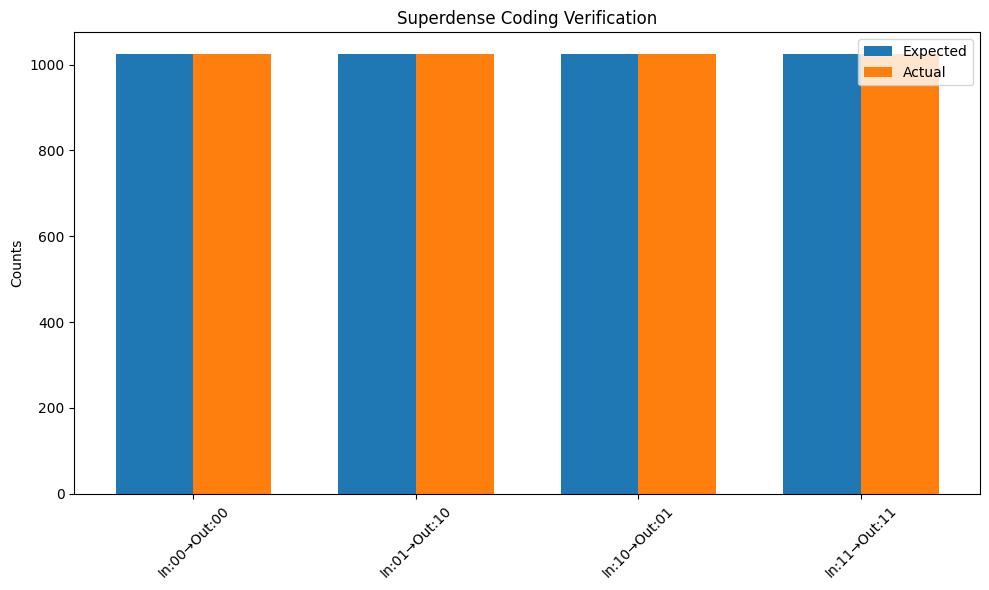

In [12]:
import numpy as np


inputs = list(counts_no_noise.keys())
outputs = [list(d.keys())[0] for d in counts_no_noise.values()]
counts = [list(d.values())[0] for d in counts_no_noise.values()]

x = np.arange(len(inputs))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(x - width/2, [1024]*4, width, label='Expected')
rects = ax.bar(x + width/2, counts, width, label='Actual')

ax.set_ylabel('Counts')
ax.set_title('Superdense Coding Verification')
ax.set_xticks(x)
ax.set_xticklabels([f"In:{i}→Out:{o}" for i,o in zip(inputs, outputs)])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Noisy Simulator**

In [13]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

using noise_model suggest by "Chat GPT" because my ibm accout is showing
Your IBM Quantum account has been disabled. Learn more: https://ibm.biz/BdfaME.

In [21]:
import pickle
with open("ibm_brisbane_noise_model.pkl", "rb") as f:
    noise_model, basis_gates = pickle.load(f)

In [22]:
sim_noise = AerSimulator(
    noise_model=noise_model,
    basis_gates= basis_gates
)

counts_with_noise = {}

for bits in ['00', '01', '10', '11']:
    qc = send_1_measured(bits)
    tqc = transpile(qc, sim_noise)
    job = sim_noise.run(tqc, shots=1024)
    result = job.result()
    counts_with_noise[bits] = result.get_counts()

print(counts_with_noise)



{'00': {'01': 28, '10': 12, '00': 984}, '01': {'11': 31, '00': 19, '10': 974}, '10': {'11': 10, '00': 27, '01': 987}, '11': {'01': 19, '10': 27, '11': 978}}


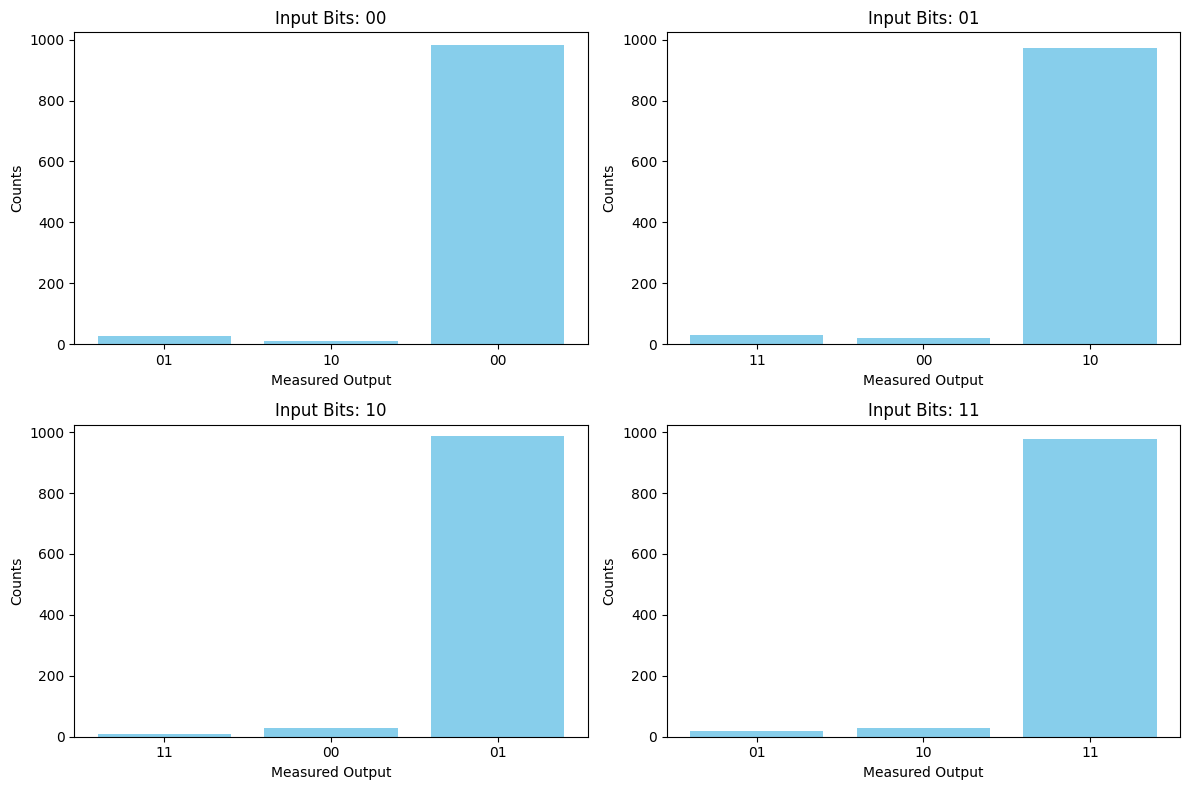

In [30]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, bits in enumerate(['00', '01', '10', '11']):
    counts = dict(counts_with_noise[bits])
    axs[i].bar(counts.keys(), counts.values(), color='skyblue')
    axs[i].set_title(f'Input Bits: {bits}')
    axs[i].set_xlabel('Measured Output')
    axs[i].set_ylabel('Counts')
    axs[i].set_ylim(0, 1024)

plt.tight_layout()
plt.show()

Now that we have the noisy simulator working, we will send a message and for each two bits, we are doing 1024 trails, since we take max, we are bypassing the possibility of transmitting a wrong bit.

In [56]:

message = "Aakash"

bits_2 = word_to_binary(message)
bits_1 = [bits_2[i:i+2] for i in range(0, len(bits_2), 2)]

VALID_BITSTRINGS = {'00', '01', '10', '11'}
received_bits_1 = []

for bits in bits_1:
    qc = send_1_measured(bits)
    tqc = transpile(qc, sim_noise)
    job = sim_noise.run(tqc, shots=1024)
    result = job.result()

    counts = result.get_counts()
    bitstring = max(counts.items(), key=lambda x: x[1])[0]
    received_bits_1.append(bitstring[::-1])


final_binary_1 = ''.join(received_bits_1)
recovered_message_1 = binary_to_word(final_binary_1)

print("Recovered message:", recovered_message_1)
print("Length of final binary:", len(final_binary_1))
print("Original binary length:", len(bits_2))


Recovered message: Aakash
Length of final binary: 48
Original binary length: 48
